In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve
)
import pickle
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('final_df_merged30_3000_tg30_3000_ALARMFIX2.csv')

In [4]:
df

,region_id,time_since_last_alarm_end_minutes_at_start_of_day,total_alarm_minutes_yesterday,alarms_started_yesterday,alarms_started_trend,was_alarm_active_end_of_yesterday,is_alarm_active_lag_7d,avg_daily_alarm_minutes_last_7_days,is_alarm_active,datetime,...,svd2_comp_24,svd2_comp_25,svd2_comp_26,svd2_comp_27,svd2_comp_28,svd2_comp_29,svd2_comp_30,hour_of_day,day_of_week,month
0,1,509629.350000,0.000000,0,0,False,False,0.000000,0,2022-02-24 00:00:00,...,-0.003743,-0.006480,-0.021615,0.011399,-0.012310,-0.046835,0.000499,0,3,2
1,2,509629.350000,0.000000,0,0,False,False,0.000000,0,2022-02-24 00:00:00,...,-0.003743,-0.006480,-0.021615,0.011399,-0.012310,-0.046835,0.000499,0,3,2
2,3,509629.350000,0.000000,0,0,False,False,0.000000,0,2022-02-24 00:00:00,...,-0.003743,-0.006480,-0.021615,0.011399,-0.012310,-0.046835,0.000499,0,3,2
3,4,509629.350000,0.000000,0,0,False,False,0.000000,0,2022-02-24 00:00:00,...,-0.003743,-0.006480,-0.021615,0.011399,-0.012310,-0.046835,0.000499,0,3,2
4,5,509629.350000,0.000000,0,0,False,False,0.000000,0,2022-02-24 00:00:00,...,-0.003743,-0.006480,-0.021615,0.011399,-0.012310,-0.046835,0.000499,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634747,21,63.300000,254.316667,5,3,True,True,294.380952,1,2025-03-01 23:00:00,...,-0.071547,0.054663,-0.000527,0.048247,-0.060574,0.023855,-0.000464,23,5,3
634748,22,2602.533333,0.000000,0,-1,False,False,99.285714,0,2025-03-01 23:00:00,...,-0.071547,0.054663,-0.000527,0.048247,-0.060574,0.023855,-0.000464,23,5,3
634749,23,377.200000,25.616667,2,2,False,False,17.128571,0,2025-03-01 23:00:00,...,-0.071547,0.054663,-0.000527,0.048247,-0.060574,0.023855,-0.000464,23,5,3
634750,24,5312.016667,0.000000,0,0,False,False,16.928571,0,2025-03-01 23:00:00,...,-0.071547,0.054663,-0.000527,0.048247,-0.060574,0.023855,-0.000464,23,5,3


In [5]:
target_column = 'is_alarm_active'

potential_features = df.columns.tolist()
features_to_exclude = [
    target_column,
    'datetime',
    'date',
    'date_value',
    'date_for_merge',
    'time_value',
]

feature_columns = [col for col in potential_features if col not in features_to_exclude]

X = df[feature_columns]
y = df[target_column]

In [6]:
# TimeSeriesSplit

n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

In [6]:
# 1. Log Regression (Variant 7)


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training Logistic Regression

Threshold Tuning (Fold 1)
Chosen Threshold: 0.9138 with Precision: 0.4001 and Recall: 0.0437

Precision-Recall Curve (Fold 1)


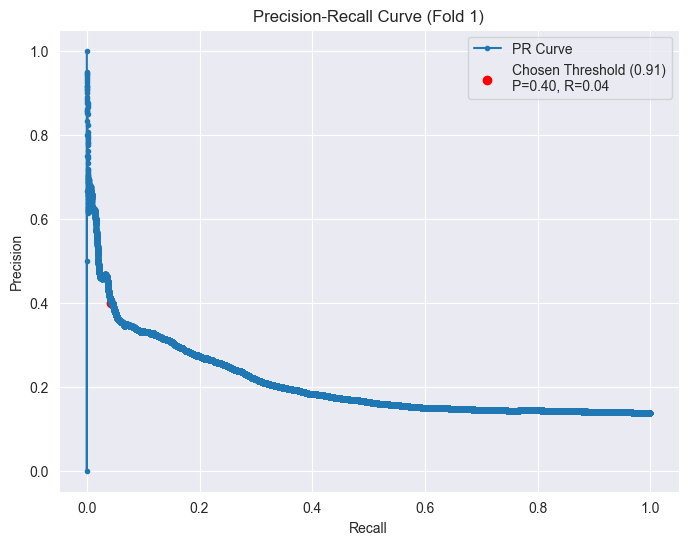

Logistic Regression Metrics (Fold 1):
  Accuracy:  0.8604
  Precision: 0.4001
  Recall:    0.0437
  F1-score:  0.0788
  ROC AUC:   0.5727
  Confusion matrix:   [[135587   1420]
 [ 20734    947]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training Logistic Regression

Threshold Tuning (Fold 2)
Chosen Threshold: 0.5125 with Precision: 0.4000 and Recall: 0.5230

Precision-Recall Curve (Fold 2)


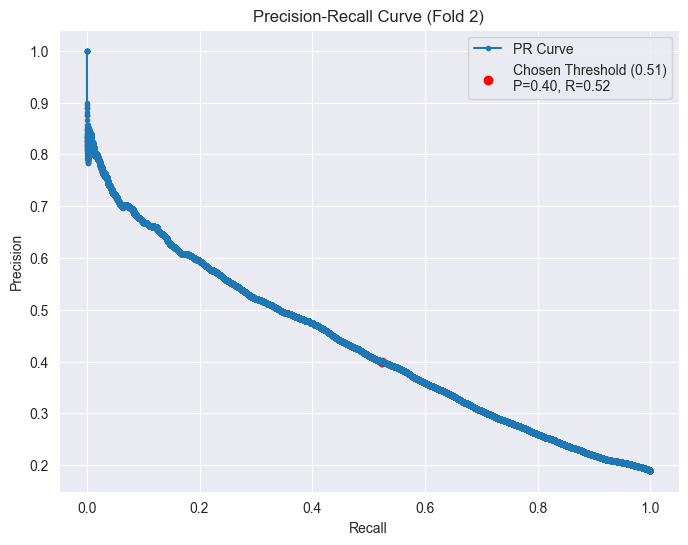

Logistic Regression Metrics (Fold 2):
  Accuracy:  0.7613
  Precision: 0.4000
  Recall:    0.5230
  F1-score:  0.4533
  ROC AUC:   0.7248
  Confusion matrix:   [[105099  23559]
 [ 14324  15706]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training Logistic Regression

Threshold Tuning (Fold 3)
Chosen Threshold: 0.4316 with Precision: 0.4000 and Recall: 0.8604

Precision-Recall Curve (Fold 3)


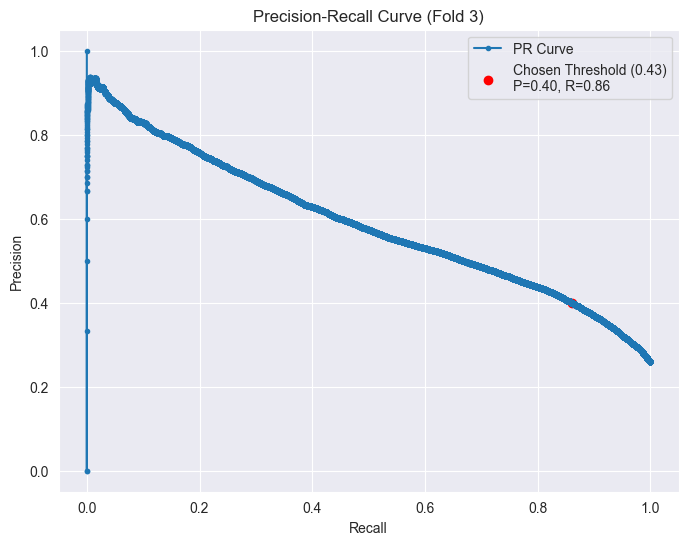

Logistic Regression Metrics (Fold 3):
  Accuracy:  0.6310
  Precision: 0.4000
  Recall:    0.8604
  F1-score:  0.5461
  ROC AUC:   0.7949
  Confusion matrix:   [[64901 52843]
 [ 5715 35229]]


In [7]:
fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # logistic regression
    print("\nTraining Logistic Regression")
    log_reg = LogisticRegression(max_iter=2000, random_state=1, class_weight='balanced')
    log_reg.fit(X_train, y_train)

    y_pred_log = log_reg.predict(X_test)
    y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_log_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4.")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_log_th = (y_pred_log_proba >= best_threshold).astype(int)

    acc_log = accuracy_score(y_test, y_pred_log_th)
    prec_log = precision_score(y_test, y_pred_log_th)
    rec_log = recall_score(y_test, y_pred_log_th)
    f1_log = f1_score(y_test, y_pred_log_th)
    cm_log = confusion_matrix(y_test, y_pred_log_th)
    roc_auc_log = roc_auc_score(y_test, y_pred_log_proba)

    print(f"Logistic Regression Metrics (Fold {fold}):")
    print(f"  Accuracy:  {acc_log:.4f}")
    print(f"  Precision: {prec_log:.4f}")
    print(f"  Recall:    {rec_log:.4f}")
    print(f"  F1-score:  {f1_log:.4f}")
    print(f"  ROC AUC:   {roc_auc_log:.4f}")
    print(f"  Confusion matrix:   {cm_log}")

In [8]:
# 2. RF


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 1)
Chosen Threshold: 0.2700 with Precision: 0.4164 and Recall: 0.2012

Precision-Recall Curve (Fold 1)


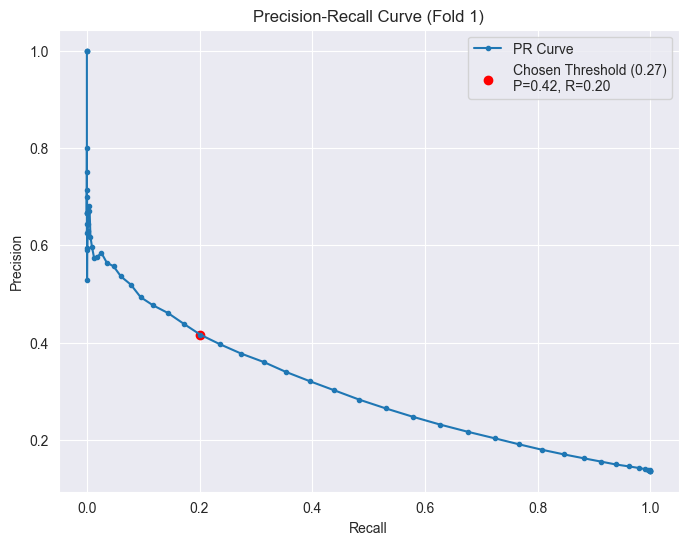

RandomForestClassifier Metrics (Fold 1, Threshold=0.27):
  Accuracy:  0.8523
  Precision: 0.4164
  Recall:    0.2012
  F1-score:  0.2713
  ROC AUC:   0.6992
  Confusion matrix:
[[130891   6116]
 [ 17318   4363]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 2)
Chosen Threshold: 0.2100 with Precision: 0.4066 and Recall: 0.6057

Precision-Recall Curve (Fold 2)


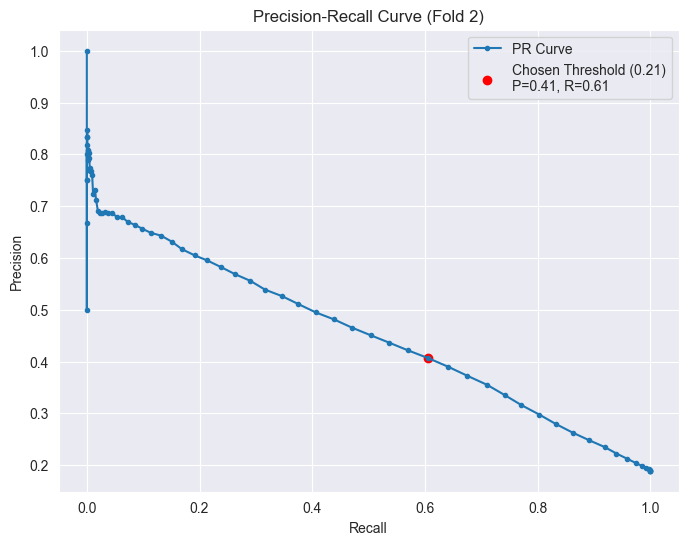

RandomForestClassifier Metrics (Fold 2, Threshold=0.21):
  Accuracy:  0.7581
  Precision: 0.4066
  Recall:    0.6057
  F1-score:  0.4865
  ROC AUC:   0.7617
  Confusion matrix:
[[102108  26550]
 [ 11841  18189]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 3)
Chosen Threshold: 0.1800 with Precision: 0.4039 and Recall: 0.8618

Precision-Recall Curve (Fold 3)


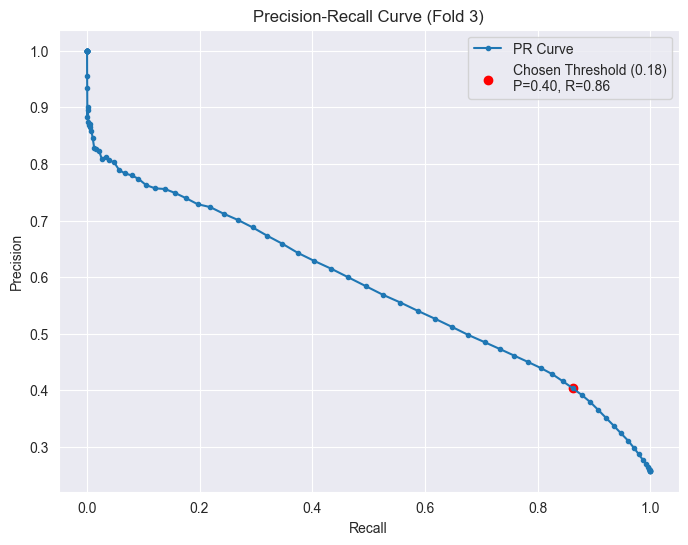

RandomForestClassifier Metrics (Fold 3, Threshold=0.18):
  Accuracy:  0.6362
  Precision: 0.4039
  Recall:    0.8618
  F1-score:  0.5500
  ROC AUC:   0.7959
  Confusion matrix:
[[65669 52075]
 [ 5659 35285]]


In [8]:
# 2.1 RF DEFAULT

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # RandomForestClassifier
    print("\nTraining RandomForestClassifier")

    rf_clf = RandomForestClassifier(random_state=1, class_weight='balanced')
    rf_clf.fit(X_train, y_train)

    y_pred_rf = rf_clf.predict(X_test)
    y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_rf_th = (y_pred_rf_proba >= best_threshold).astype(int)


    acc_rf = accuracy_score(y_test, y_pred_rf_th)
    prec_rf = precision_score(y_test, y_pred_rf_th)
    rec_rf = recall_score(y_test, y_pred_rf_th)
    f1_rf = f1_score(y_test, y_pred_rf_th)
    cm_rf = confusion_matrix(y_test, y_pred_rf_th)
    roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

    print(f"RandomForestClassifier Metrics (Fold {fold}, Threshold={best_threshold}):")
    print(f"  Accuracy:  {acc_rf:.4f}")
    print(f"  Precision: {prec_rf:.4f}")
    print(f"  Recall:    {rec_rf:.4f}")
    print(f"  F1-score:  {f1_rf:.4f}")
    print(f"  ROC AUC:   {roc_auc_rf:.4f}")
    print(f"  Confusion matrix:\n{cm_rf}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 1)
Chosen Threshold: 0.5483 with Precision: 0.4000 and Recall: 0.2924

Precision-Recall Curve (Fold 1)


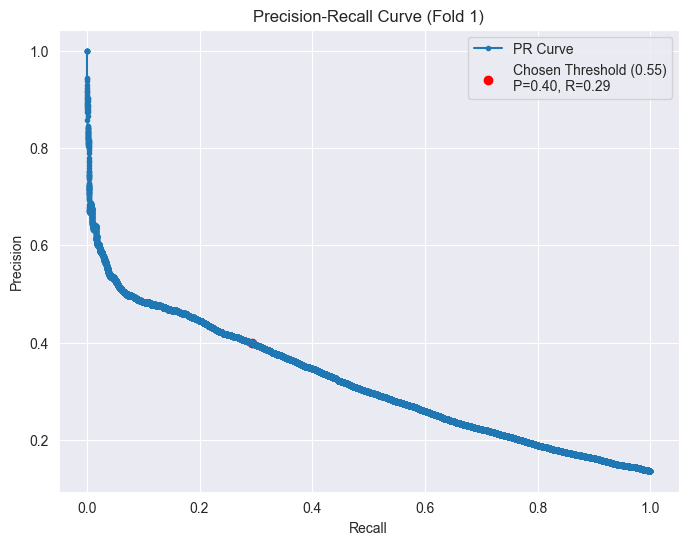

RandomForestClassifier Metrics (Fold 1, Threshold=0.5482666629237378):
  Accuracy:  0.8434
  Precision: 0.4000
  Recall:    0.2924
  F1-score:  0.3378
  ROC AUC:   0.7143
  Confusion matrix:
[[127499   9508]
 [ 15342   6339]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 2)
Chosen Threshold: 0.5279 with Precision: 0.4000 and Recall: 0.6692

Precision-Recall Curve (Fold 2)


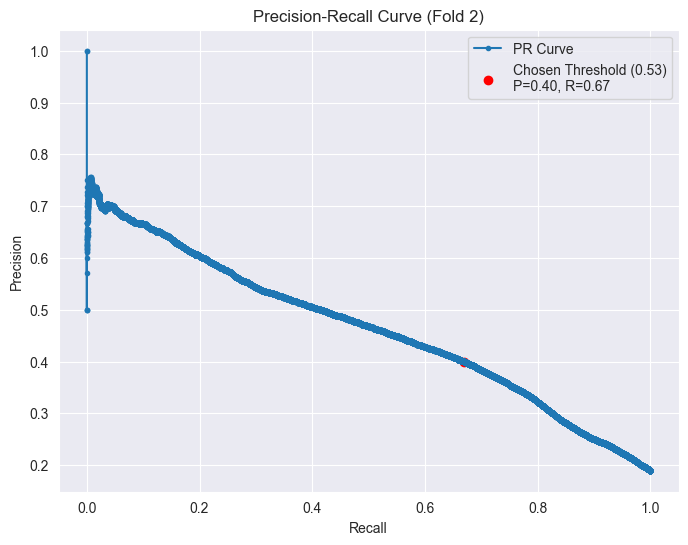

RandomForestClassifier Metrics (Fold 2, Threshold=0.5279060266249272):
  Accuracy:  0.7474
  Precision: 0.4000
  Recall:    0.6692
  F1-score:  0.5007
  ROC AUC:   0.7750
  Confusion matrix:
[[98516 30142]
 [ 9935 20095]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training RandomForestClassifier

Threshold Tuning (Fold 3)
Chosen Threshold: 0.4351 with Precision: 0.4000 and Recall: 0.8806

Precision-Recall Curve (Fold 3)


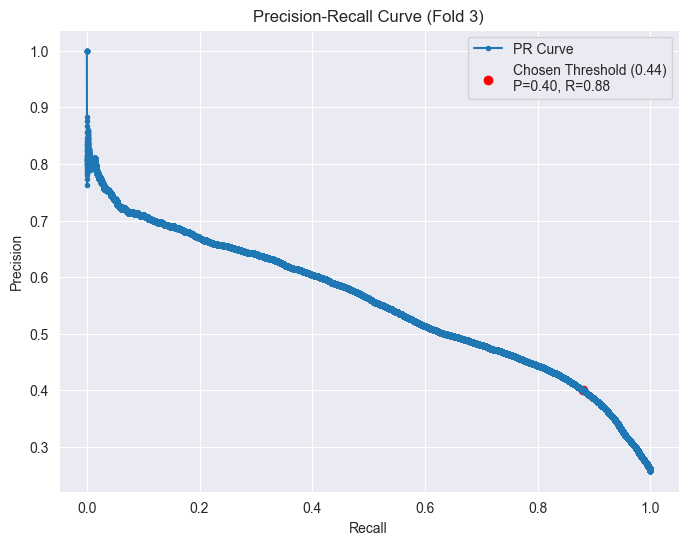

RandomForestClassifier Metrics (Fold 3, Threshold=0.43513195548190065):
  Accuracy:  0.6284
  Precision: 0.4000
  Recall:    0.8806
  F1-score:  0.5501
  ROC AUC:   0.7929
  Confusion matrix:
[[63664 54080]
 [ 4890 36054]]


In [7]:
# 2.2 RF TUNED

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # RandomForestClassifier
    print("\nTraining RandomForestClassifier")

    rf_clf = RandomForestClassifier(
        random_state=1,
        class_weight='balanced',
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        max_depth=10
    )
    rf_clf.fit(X_train, y_train)

    y_pred_rf = rf_clf.predict(X_test)
    y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_rf_th = (y_pred_rf_proba >= best_threshold).astype(int)

    acc_rf = accuracy_score(y_test, y_pred_rf_th)
    prec_rf = precision_score(y_test, y_pred_rf_th)
    rec_rf = recall_score(y_test, y_pred_rf_th)
    f1_rf = f1_score(y_test, y_pred_rf_th)
    cm_rf = confusion_matrix(y_test, y_pred_rf_th)
    roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

    print(f"RandomForestClassifier Metrics (Fold {fold}, Threshold={best_threshold}):")
    print(f"  Accuracy:  {acc_rf:.4f}")
    print(f"  Precision: {prec_rf:.4f}")
    print(f"  Recall:    {rec_rf:.4f}")
    print(f"  F1-score:  {f1_rf:.4f}")
    print(f"  ROC AUC:   {roc_auc_rf:.4f}")
    print(f"  Confusion matrix:\n{cm_rf}")

In [8]:
# 2.3. RF FEATURE IMPORTANCES

rf_importances = []

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # RandomForestClassifier
    print("\nTraining RandomForestClassifier")

    rf_clf = RandomForestClassifier(
        random_state=1,
        class_weight='balanced',
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        max_depth=10
    )
    rf_clf.fit(X_train, y_train)

    rf_importances.append(rf_clf.feature_importances_)

    y_pred_rf = rf_clf.predict(X_test)
    y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]

    y_pred_rf_th = (y_pred_rf_proba >= 0.29).astype(int)

    acc_rf = accuracy_score(y_test, y_pred_rf_th)
    prec_rf = precision_score(y_test, y_pred_rf_th)
    rec_rf = recall_score(y_test, y_pred_rf_th)
    f1_rf = f1_score(y_test, y_pred_rf_th)
    cm_rf = confusion_matrix(y_test, y_pred_rf_th)
    roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

    print(f"RandomForestClassifier Metrics (Fold {fold}, Threshold=0.29):")
    print(f"  Accuracy:  {acc_rf:.4f}")
    print(f"  Precision: {prec_rf:.4f}")
    print(f"  Recall:    {rec_rf:.4f}")
    print(f"  F1-score:  {f1_rf:.4f}")
    print(f"  ROC AUC:   {roc_auc_rf:.4f}")
    print(f"  Confusion matrix:\n{cm_rf}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training RandomForestClassifier
RandomForestClassifier Metrics (Fold 1, Threshold=0.29):
  Accuracy:  0.4475
  Precision: 0.1775
  Recall:    0.8381
  F1-score:  0.2930
  ROC AUC:   0.7143
  Confusion matrix:
[[52836 84171]
 [ 3511 18170]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training RandomForestClassifier
RandomForestClassifier Metrics (Fold 2, Threshold=0.29):
  Accuracy:  0.3691
  Precision: 0.2242
  Recall:    0.9486
  F1-score:  0.3627
  ROC AUC:   0.7750
  Confusion matrix:
[[30077 98581]
 [ 1543 28487]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training RandomForestClassifier

In [9]:
df_avg_rf = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": np.mean(rf_importances, axis=0),
})

df_avg_rf = df_avg_rf.sort_values(by="Coefficient", ascending=False)
df_avg_rf

,Feature,Coefficient
7,avg_daily_alarm_minutes_last_7_days,0.174426
2,total_alarm_minutes_yesterday,0.100898
3,alarms_started_yesterday,0.091316
1,time_since_last_alarm_end_minutes_at_start_of_day,0.079786
91,hour_of_day,0.033757
...,...,...
25,rain_bin,0.000495
24,precipprob_binary,0.000359
9,snow,0.000131
26,snow_bin,0.000096


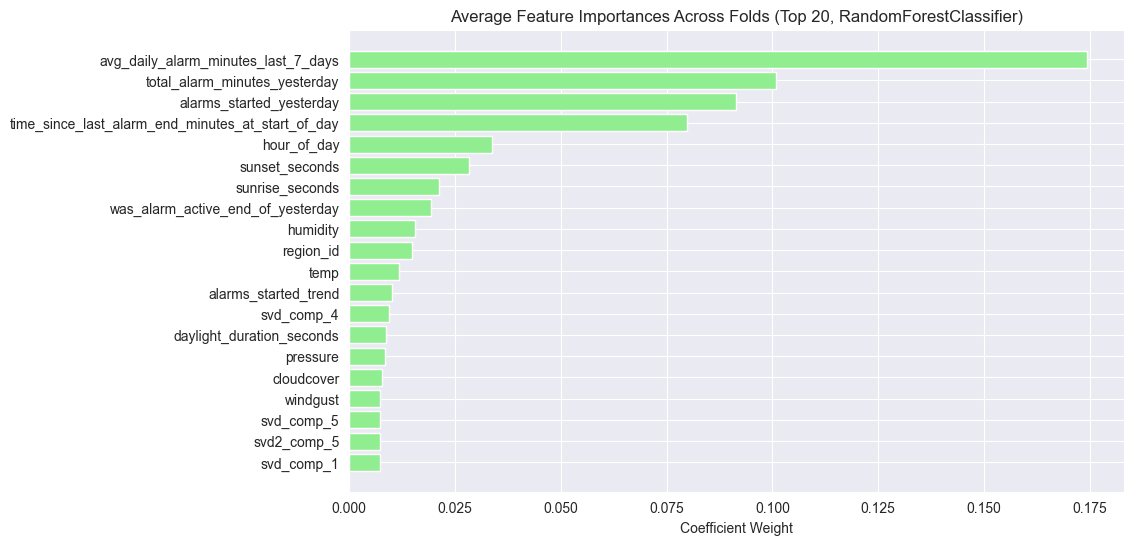

In [10]:
df_avg_rf_top20 = df_avg_rf.sort_values(by="Coefficient", ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(df_avg_rf_top20["Feature"], df_avg_rf_top20["Coefficient"], color='lightgreen')
plt.xlabel("Coefficient Weight")
plt.title("Average Feature Importances Across Folds (Top 20, RandomForestClassifier)")
plt.gca().invert_yaxis()
plt.show()

In [11]:
# 2.5. SAVING FINAL RF

final_scaler = StandardScaler()
final_model_rf = RandomForestClassifier(
        random_state=1,
        class_weight='balanced',
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=3,
        max_features='sqrt',
        max_depth=10
    )
X_scaled_final = final_scaler.fit_transform(X)
final_model_rf.fit(X_scaled_final, y)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=10,
                       random_state=1)

In [12]:
with open('4__random_forest__v3.pkl', 'wb') as f:
    pickle.dump(final_model_rf, f)

with open('final_scaler.pkl', 'wb') as f:
    pickle.dump(final_scaler, f)

In [13]:
# 3. HGB


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 1)
Chosen Threshold: 0.5087 with Precision: 0.4000 and Recall: 0.3006

Precision-Recall Curve (Fold 1)


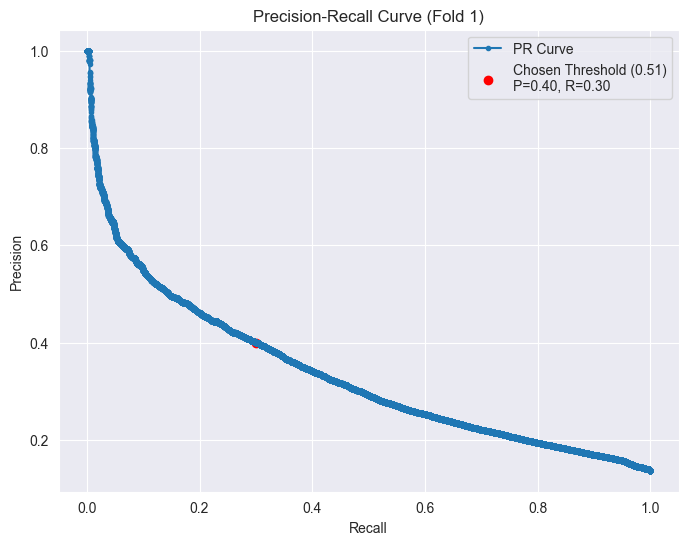

HistGradientBoosting Metrics (Fold 1, Threshold=0.5087303156129895):
  Accuracy:  0.8428
  Precision: 0.4000
  Recall:    0.3006
  F1-score:  0.3432
  ROC AUC:   0.7211
  Confusion matrix:
[[127232   9775]
 [ 15164   6517]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 2)
Chosen Threshold: 0.5287 with Precision: 0.4000 and Recall: 0.6634

Precision-Recall Curve (Fold 2)


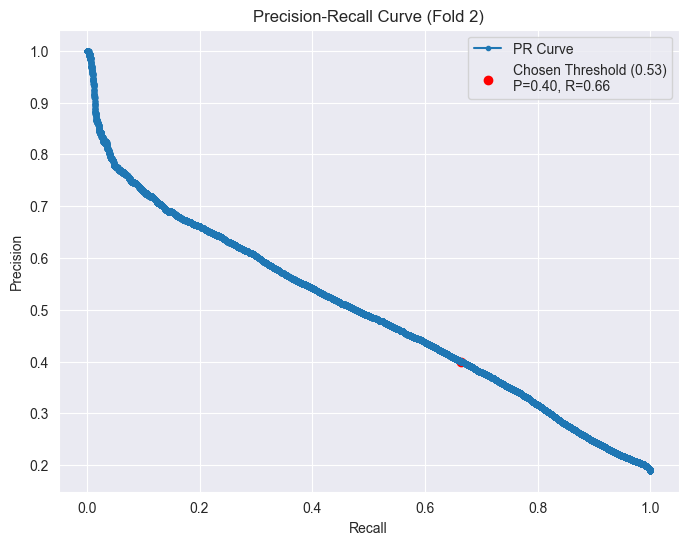

HistGradientBoosting Metrics (Fold 2, Threshold=0.5287029678098407):
  Accuracy:  0.7480
  Precision: 0.4000
  Recall:    0.6634
  F1-score:  0.4991
  ROC AUC:   0.7769
  Confusion matrix:
[[98774 29884]
 [10107 19923]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 3)
Chosen Threshold: 0.4221 with Precision: 0.4000 and Recall: 0.8732

Precision-Recall Curve (Fold 3)


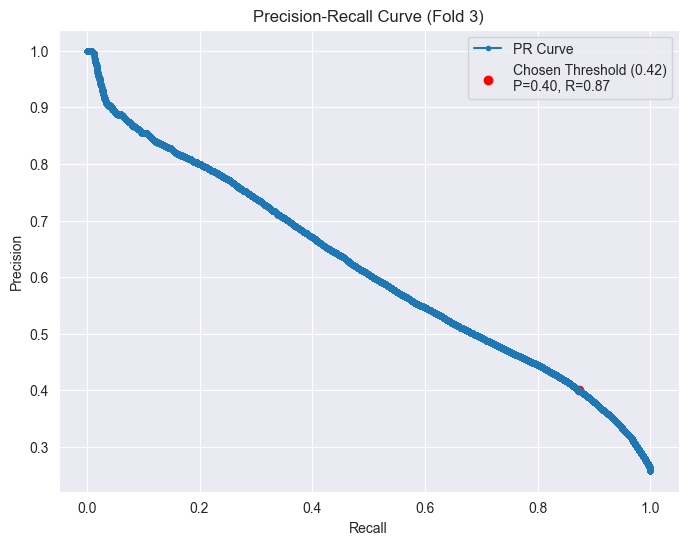

HistGradientBoosting Metrics (Fold 3, Threshold=0.42209351286154):
  Accuracy:  0.6293
  Precision: 0.4000
  Recall:    0.8732
  F1-score:  0.5487
  ROC AUC:   0.8061
  Confusion matrix:
[[64113 53631]
 [ 5190 35754]]


In [10]:
# 3.1. HGB DEFAULT

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # HistGradientBoostingClassifier
    print("\nTraining HistGradientBoostingClassifier")
    hgb_model = HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=1
    )

    hgb_model.fit(X_train, y_train)

    y_pred_hgb_proba = hgb_model.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_hgb_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4.")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_hgb_th = (y_pred_hgb_proba >= best_threshold).astype(int)

    acc_hgb = accuracy_score(y_test, y_pred_hgb_th)
    prec_hgb = precision_score(y_test, y_pred_hgb_th)
    rec_hgb = recall_score(y_test, y_pred_hgb_th)
    f1_hgb = f1_score(y_test, y_pred_hgb_th)
    cm_hgb = confusion_matrix(y_test, y_pred_hgb_th)
    roc_auc_hgb = roc_auc_score(y_test, y_pred_hgb_proba)

    print(f"HistGradientBoosting Metrics (Fold {fold}, Threshold={best_threshold}):")
    print(f"  Accuracy:  {acc_hgb:.4f}")
    print(f"  Precision: {prec_hgb:.4f}")
    print(f"  Recall:    {rec_hgb:.4f}")
    print(f"  F1-score:  {f1_hgb:.4f}")
    print(f"  ROC AUC:   {roc_auc_hgb:.4f}")
    print(f"  Confusion matrix:\n{cm_hgb}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 1)
Chosen Threshold: 0.5500 with Precision: 0.4000 and Recall: 0.3270

Precision-Recall Curve (Fold 1)


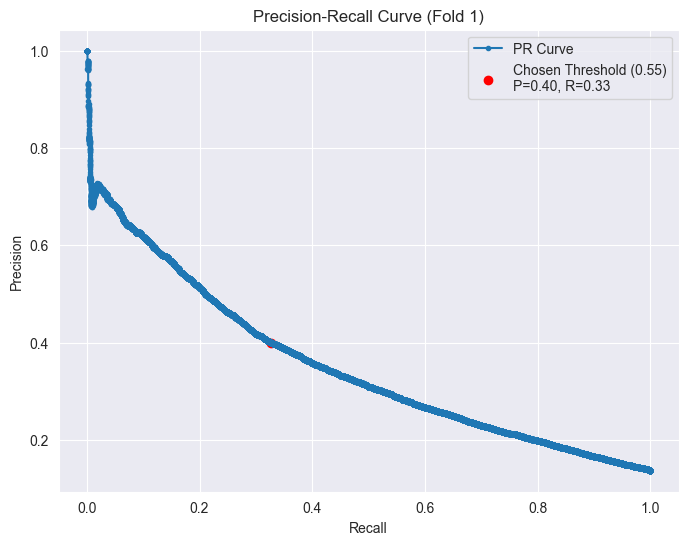

HistGradientBoosting Metrics (Fold 1, Threshold=0.5500146330502919):
  Accuracy:  0.8410
  Precision: 0.4000
  Recall:    0.3270
  F1-score:  0.3598
  ROC AUC:   0.7278
  Confusion matrix:
[[126374  10633]
 [ 14592   7089]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 2)
Chosen Threshold: 0.5473 with Precision: 0.4000 and Recall: 0.6861

Precision-Recall Curve (Fold 2)


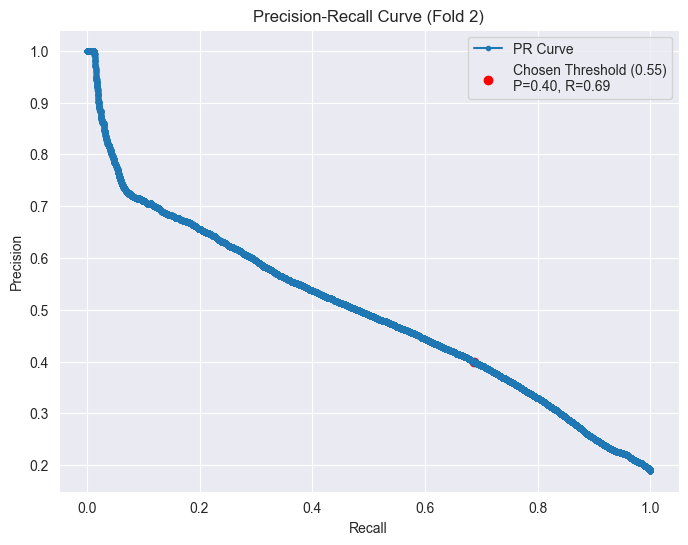

HistGradientBoosting Metrics (Fold 2, Threshold=0.5472675624288461):
  Accuracy:  0.7458
  Precision: 0.4000
  Recall:    0.6861
  F1-score:  0.5054
  ROC AUC:   0.7835
  Confusion matrix:
[[97754 30904]
 [ 9427 20603]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training HistGradientBoostingClassifier

Threshold Tuning (Fold 3)
Chosen Threshold: 0.4495 with Precision: 0.4000 and Recall: 0.8820

Precision-Recall Curve (Fold 3)


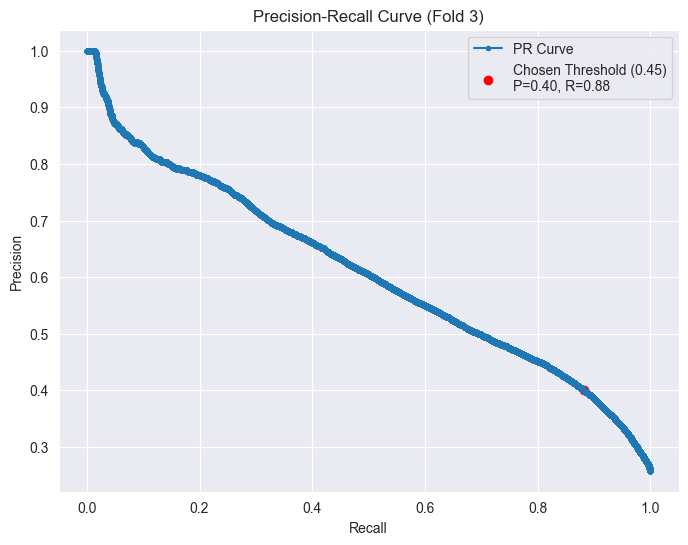

HistGradientBoosting Metrics (Fold 3, Threshold=0.44954988287707176):
  Accuracy:  0.6282
  Precision: 0.4000
  Recall:    0.8820
  F1-score:  0.5504
  ROC AUC:   0.8076
  Confusion matrix:
[[63576 54168]
 [ 4832 36112]]


In [11]:
# 3.2 HGB TUNED

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # HistGradientBoostingClassifier
    print("\nTraining HistGradientBoostingClassifier")
    hgb_model = HistGradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.01,
        max_iter=400,
        max_leaf_nodes=61,
        max_depth=None,
        l2_regularization=0.5,
        class_weight='balanced',
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=30,
        min_samples_leaf=40,
        random_state=1
    )

    hgb_model.fit(X_train, y_train)

    y_pred_hgb_proba = hgb_model.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_hgb_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4.")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_hgb_th = (y_pred_hgb_proba >= best_threshold).astype(int)

    acc_hgb = accuracy_score(y_test, y_pred_hgb_th)
    prec_hgb = precision_score(y_test, y_pred_hgb_th)
    rec_hgb = recall_score(y_test, y_pred_hgb_th)
    f1_hgb = f1_score(y_test, y_pred_hgb_th)
    cm_hgb = confusion_matrix(y_test, y_pred_hgb_th)
    roc_auc_hgb = roc_auc_score(y_test, y_pred_hgb_proba)

    print(f"HistGradientBoosting Metrics (Fold {fold}, Threshold={best_threshold}):")
    print(f"  Accuracy:  {acc_hgb:.4f}")
    print(f"  Precision: {prec_hgb:.4f}")
    print(f"  Recall:    {rec_hgb:.4f}")
    print(f"  F1-score:  {f1_hgb:.4f}")
    print(f"  ROC AUC:   {roc_auc_hgb:.4f}")
    print(f"  Confusion matrix:\n{cm_hgb}")

In [ ]:
# 3.3. HGB FEATURE IMPORTANCES

hgb_perm_importances = []

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # HistGradientBoostingClassifier
    print("\nTraining HistGradientBoostingClassifier")
    hgb_model = HistGradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.01,
        max_iter=400,
        max_leaf_nodes=61,
        max_depth=None,
        l2_regularization=0.5,
        class_weight='balanced',
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=30,
        min_samples_leaf=40,
        random_state=1
    )

    hgb_model.fit(X_train, y_train)

    print(f"Calculating Permutation Importance for Fold {fold}...")
    perm_result = permutation_importance(
        hgb_model,
        X_test,
        y_test,
        n_repeats=5,
        random_state=1,
        n_jobs=-1,
        scoring='roc_auc'
    )
    hgb_perm_importances.append(perm_result.importances_mean)

    y_pred_hgb_proba = hgb_model.predict_proba(X_test)[:, 1]

    y_pred_hgb_th = (y_pred_hgb_proba >= 0.43).astype(int) # finalized for HGB

    acc_hgb = accuracy_score(y_test, y_pred_hgb_th)
    prec_hgb = precision_score(y_test, y_pred_hgb_th)
    rec_hgb = recall_score(y_test, y_pred_hgb_th)
    f1_hgb = f1_score(y_test, y_pred_hgb_th)
    cm_hgb = confusion_matrix(y_test, y_pred_hgb_th)
    roc_auc_hgb = roc_auc_score(y_test, y_pred_hgb_proba)

    print(f"HistGradientBoosting Metrics (Fold {fold}, Threshold=0.43):")
    print(f"  Accuracy:  {acc_hgb:.4f}")
    print(f"  Precision: {prec_hgb:.4f}")
    print(f"  Recall:    {rec_hgb:.4f}")
    print(f"  F1-score:  {f1_hgb:.4f}")
    print(f"  ROC AUC:   {roc_auc_hgb:.4f}")
    print(f"  Confusion matrix:\n{cm_hgb}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training HistGradientBoostingClassifier


In [20]:
avg_importances = np.mean(hgb_perm_importances, axis=0)

df_avg_hgb = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": avg_importances,
    "Absolute": np.abs(avg_importances) # although they shouldn't, they can be negative if shuffling improves the model's performance
})

df_avg_hgb = df_avg_hgb.sort_values(by="Absolute", ascending=False)
df_avg_hgb

,Feature,Coefficient,Absolute
7,avg_daily_alarm_minutes_last_7_days,1.191831e-01,1.191831e-01
91,hour_of_day,4.163692e-02,4.163692e-02
5,was_alarm_active_end_of_yesterday,3.820769e-02,3.820769e-02
28,sunrise_seconds,7.294487e-03,7.294487e-03
29,sunset_seconds,4.361601e-03,4.361601e-03
...,...,...,...
25,rain_bin,1.192162e-06,1.192162e-06
26,snow_bin,-9.946773e-07,9.946773e-07
27,rain_snow_bin,0.000000e+00,0.000000e+00
9,snow,0.000000e+00,0.000000e+00


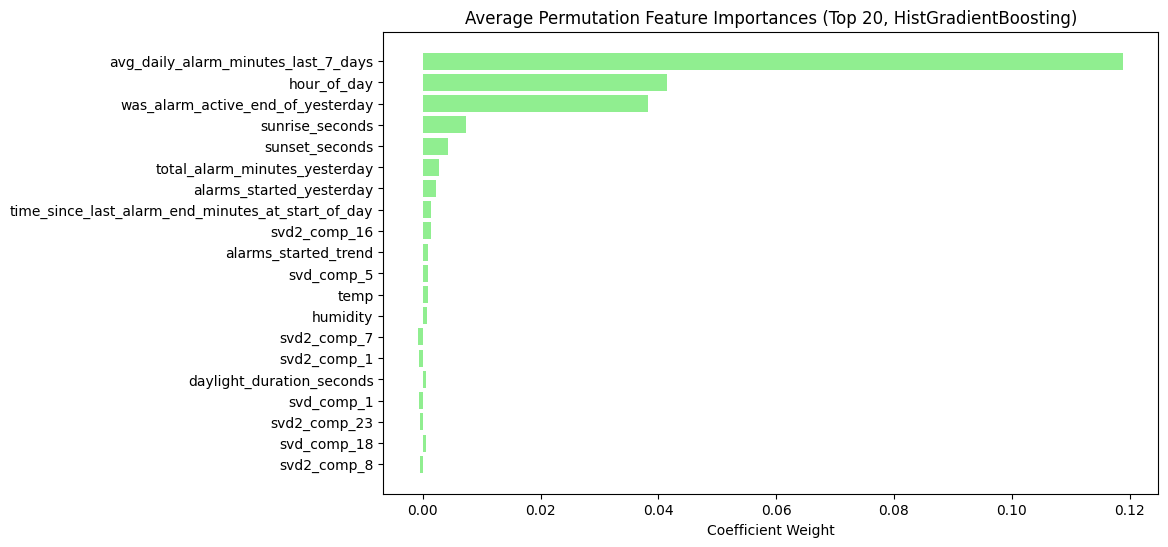

In [18]:
df_avg_hgb_top20 = df_avg_hgb.sort_values(by="Absolute", ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(df_avg_hgb_top20["Feature"], df_avg_hgb_top20["Coefficient"], color='lightgreen')
plt.xlabel("Coefficient Weight")
plt.title("Average Permutation Feature Importances (Top 20, HistGradientBoosting)")
plt.gca().invert_yaxis()
plt.show()

In [5]:
# 3.5. SAVING FINAL HGB

final_scaler = StandardScaler()
final_model_hgb = HistGradientBoostingClassifier(
        loss='log_loss',
        learning_rate=0.01,
        max_iter=400,
        max_leaf_nodes=61,
        max_depth=None,
        l2_regularization=0.5,
        class_weight='balanced',
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=30,
        min_samples_leaf=40,
        random_state=1
)
X_scaled_final = final_scaler.fit_transform(X)
final_model_hgb.fit(X_scaled_final, y)

HistGradientBoostingClassifier(class_weight={0: 1, 1: 10}, early_stopping=True,
                               l2_regularization=1.0, learning_rate=0.05,
                               max_iter=200, max_leaf_nodes=41,
                               n_iter_no_change=15, random_state=1,
                               validation_fraction=0.15)

In [6]:
with open('4__hist_gradient_boosting_classifier__v3.pkl', 'wb') as f:
    pickle.dump(final_model_hgb, f)

with open('final_scaler.pkl', 'wb') as f:
    pickle.dump(final_scaler, f)

In [21]:
# 4. MLP


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training MLP Classifier

Threshold Tuning (Fold 1)
Chosen Threshold: 1.0000 with Precision: 0.5000 and Recall: 0.0000

Precision-Recall Curve (Fold 1)


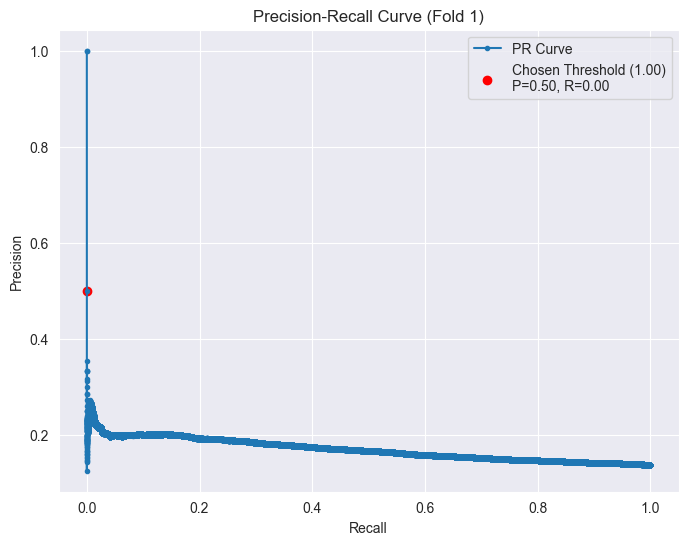

MLP Classifier Metrics (Fold 1, Th 0.9999999999998346):
  Accuracy:  0.8634
  Precision: 0.5000
  Recall:    0.0000
  F1-score:  0.0001
  ROC AUC:   0.5681
  Confusion matrix:
[[137006      1]
 [ 21680      1]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training MLP Classifier

Threshold Tuning (Fold 2)
Chosen Threshold: 1.0000 with Precision: 0.4000 and Recall: 0.0165

Precision-Recall Curve (Fold 2)


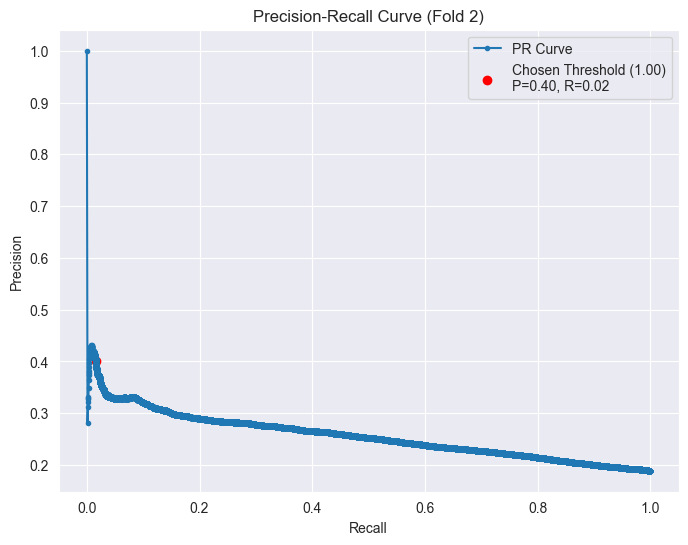

MLP Classifier Metrics (Fold 2, Th 0.9999999999997466):
  Accuracy:  0.8092
  Precision: 0.4000
  Recall:    0.0165
  F1-score:  0.0317
  ROC AUC:   0.6035
  Confusion matrix:
[[127914    744]
 [ 29534    496]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training MLP Classifier

Threshold Tuning (Fold 3)
Chosen Threshold: 1.0000 with Precision: 0.4000 and Recall: 0.1027

Precision-Recall Curve (Fold 3)


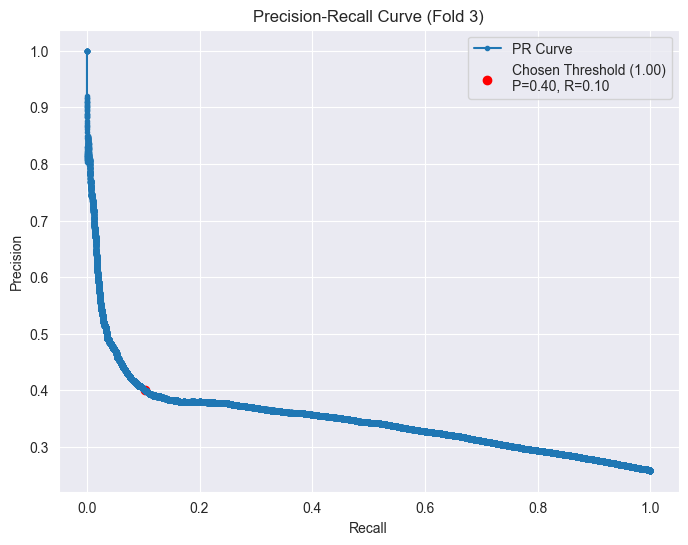

MLP Classifier Metrics (Fold 3, Th 0.9999573547374837):
  Accuracy:  0.7287
  Precision: 0.4000
  Recall:    0.1027
  F1-score:  0.1635
  ROC AUC:   0.6138
  Confusion matrix:
[[111435   6309]
 [ 36738   4206]]


In [12]:
# 4.1 MLP DEFAULT

# from imblearn.over_sampling import SMOTE

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # MLP Classifier
    print("\nTraining MLP Classifier")
    mlp = MLPClassifier(
        random_state=1,
        max_iter=500, # to prevent ConvergenceWarning
    )

    # X_train, y_train = SMOTE(random_state=1).fit_resample(X_train, y_train)
    # actually it shows consistently worse results and makes it impossible to find th with precision > 0.3 for 1 and 2 folds
    # SMOTE here generates samples that fall into the wrong category?

    mlp.fit(X_train, y_train)
    y_pred_mlp_proba = mlp.predict_proba(X_test)[:, 1]

    # Threshold Tuning
    print(f"\nThreshold Tuning (Fold {fold})")

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_mlp_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4.")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_mlp_th = (y_pred_mlp_proba >= best_threshold).astype(int)

    acc_mlp = accuracy_score(y_test, y_pred_mlp_th)
    prec_mlp = precision_score(y_test, y_pred_mlp_th, zero_division=0)
    rec_mlp = recall_score(y_test, y_pred_mlp_th, zero_division=0)
    f1_mlp = f1_score(y_test, y_pred_mlp_th, zero_division=0)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp_th)
    roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_proba)

    print(f"MLP Classifier Metrics (Fold {fold}, Th {best_threshold}):")
    print(f"  Accuracy:  {acc_mlp:.4f}")
    print(f"  Precision: {prec_mlp:.4f}")
    print(f"  Recall:    {rec_mlp:.4f}")
    print(f"  F1-score:  {f1_mlp:.4f}")
    print(f"  ROC AUC:   {roc_auc_mlp:.4f}")
    print(f"  Confusion matrix:\n{cm_mlp}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training MLP Classifier

Threshold Tuning (Fold 1)
Chosen Threshold: 0.3814 with Precision: 0.4000 and Recall: 0.1621

Precision-Recall Curve (Fold 1)


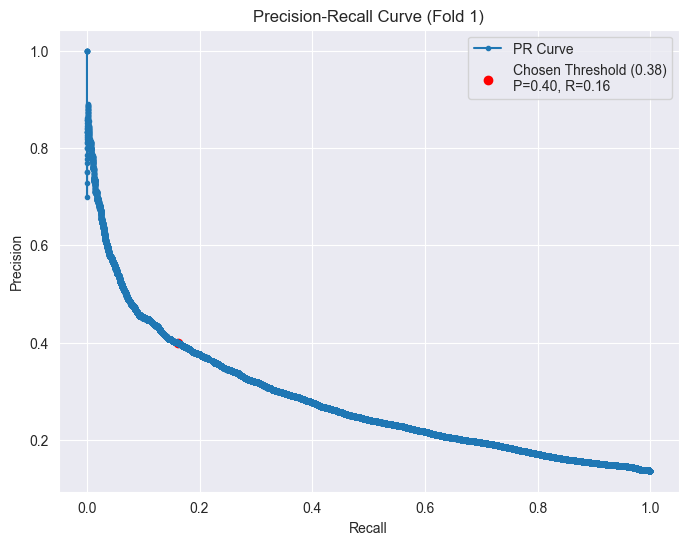

MLP Classifier Metrics (Fold 1):
  Accuracy:  0.8523
  Precision: 0.4000
  Recall:    0.1621
  F1-score:  0.2307
  ROC AUC:   0.6724
  Confusion matrix:
[[131735   5272]
 [ 18166   3515]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training MLP Classifier

Threshold Tuning (Fold 2)
Chosen Threshold: 0.2839 with Precision: 0.4000 and Recall: 0.6142

Precision-Recall Curve (Fold 2)


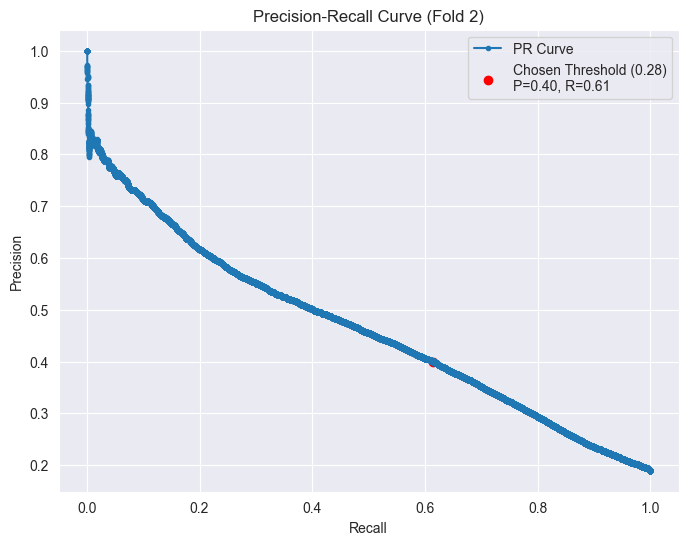

MLP Classifier Metrics (Fold 2):
  Accuracy:  0.7526
  Precision: 0.4000
  Recall:    0.6142
  F1-score:  0.4845
  ROC AUC:   0.7570
  Confusion matrix:
[[100991  27667]
 [ 11585  18445]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01 23:00:00

Training MLP Classifier

Threshold Tuning (Fold 3)
Chosen Threshold: 0.1934 with Precision: 0.4000 and Recall: 0.8667

Precision-Recall Curve (Fold 3)


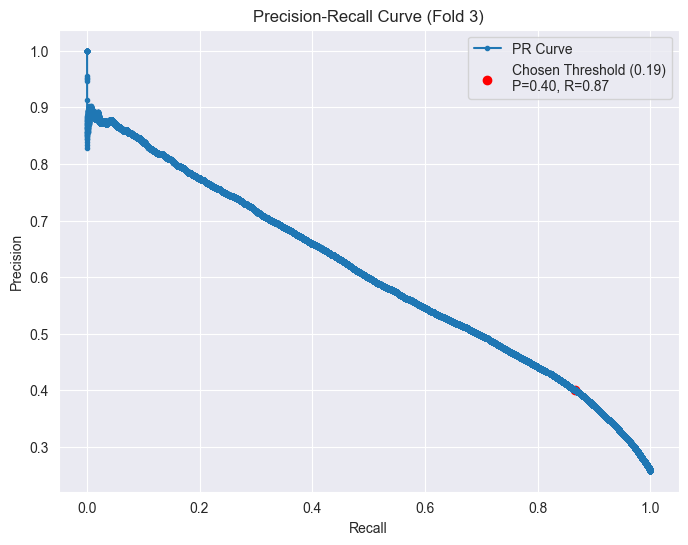

MLP Classifier Metrics (Fold 3):
  Accuracy:  0.6302
  Precision: 0.4000
  Recall:    0.8667
  F1-score:  0.5474
  ROC AUC:   0.8016
  Confusion matrix:
[[64514 53230]
 [ 5457 35487]]


In [13]:
# 4.2 MLP TUNED

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # MLP Classifier
    print("\nTraining MLP Classifier")
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.1,
        batch_size=128,
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=2000,
        random_state=1,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=15
    )

    mlp.fit(X_train, y_train)
    y_pred_mlp_proba = mlp.predict_proba(X_test)[:, 1]


    print(f"\nThreshold Tuning (Fold {fold})")
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_mlp_proba)
    precision_candidates = precision[:-1]
    recall_candidates = recall[:-1]

    valid_mask = precision_candidates >= 0.4

    if np.any(valid_mask):
        valid_precisions = precision_candidates[valid_mask]
        valid_recalls = recall_candidates[valid_mask]
        valid_thresholds = thresholds[valid_mask]

        best_idx = np.argmax(valid_recalls)
        best_threshold = valid_thresholds[best_idx]
        best_precision = valid_precisions[best_idx]
        best_recall = valid_recalls[best_idx]
        print(f"Chosen Threshold: {best_threshold:.4f} with Precision: {best_precision:.4f} and Recall: {best_recall:.4f}")

    else:
        print("No threshold meets the precision requirement of 0.4.")
        break


    print(f"\nPrecision-Recall Curve (Fold {fold})")
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label='PR Curve')
    plt.scatter(best_recall, best_precision, marker='o', color='red',
                label=f'Chosen Threshold ({best_threshold:.2f})\nP={best_precision:.2f}, R={best_recall:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve (Fold {fold})')
    plt.legend()
    plt.grid(True)
    plt.show()

    y_pred_mlp_th = (y_pred_mlp_proba >= best_threshold).astype(int)

    acc_mlp = accuracy_score(y_test, y_pred_mlp_th)
    prec_mlp = precision_score(y_test, y_pred_mlp_th, zero_division=0)
    rec_mlp = recall_score(y_test, y_pred_mlp_th, zero_division=0)
    f1_mlp = f1_score(y_test, y_pred_mlp_th, zero_division=0)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp_th)
    roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_proba)

    print(f"MLP Classifier Metrics (Fold {fold}):")
    print(f"  Accuracy:  {acc_mlp:.4f}")
    print(f"  Precision: {prec_mlp:.4f}")
    print(f"  Recall:    {rec_mlp:.4f}")
    print(f"  F1-score:  {f1_mlp:.4f}")
    print(f"  ROC AUC:   {roc_auc_mlp:.4f}")
    print(f"  Confusion matrix:\n{cm_mlp}")

In [27]:
# 4.2 MLP FEATURES IMPORTANCE

mlp_perm_importances = []

fold = 0
for train_index, test_index in tscv.split(X):
    fold += 1
    print(f"\nFold {fold}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
    print(f"Train period: {df.iloc[train_index]['datetime'].min()} to {df.iloc[train_index]['datetime'].max()}")
    print(f"Test period : {df.iloc[test_index]['datetime'].min()} to {df.iloc[test_index]['datetime'].max()}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # MLP Classifier
    print("\nTraining MLP Classifier")
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.1,
        batch_size=128,
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=2000,
        random_state=1,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=15
    )

    mlp.fit(X_train, y_train)

    print(f"Calculating Permutation Importance for Fold {fold}...")
    perm_result = permutation_importance(
        mlp,
        X_test,
        y_test,
        n_repeats=10,
        random_state=1,
        n_jobs=-1,
        scoring='roc_auc'
    )
    mlp_perm_importances.append(perm_result.importances_mean)

    y_pred_mlp_proba = mlp.predict_proba(X_test)[:, 1]

    y_pred_mlp_th = (y_pred_mlp_proba >= 0.0913).astype(int)

    acc_mlp = accuracy_score(y_test, y_pred_mlp_th)
    prec_mlp = precision_score(y_test, y_pred_mlp_th, zero_division=0)
    rec_mlp = recall_score(y_test, y_pred_mlp_th, zero_division=0)
    f1_mlp = f1_score(y_test, y_pred_mlp_th, zero_division=0)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp_th)
    roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_proba)

    print(f"MLP Classifier Metrics (Fold {fold}):")
    print(f"  Accuracy:  {acc_mlp:.4f}")
    print(f"  Precision: {prec_mlp:.4f}")
    print(f"  Recall:    {rec_mlp:.4f}")
    print(f"  F1-score:  {f1_mlp:.4f}")
    print(f"  ROC AUC:   {roc_auc_mlp:.4f}")
    print(f"  Confusion matrix:\n{cm_mlp}")


Fold 1/3
Train size: 158688, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2022-11-26 11:00:00
Test period : 2022-11-26 12:00:00 to 2023-08-28 23:00:00

Training MLP Classifier
Calculating Permutation Importance for Fold 1...
MLP Classifier Metrics (Fold 1):
  Accuracy:  0.8453
  Precision: 0.1733
  Recall:    0.3043
  F1-score:  0.2208
  ROC AUC:   0.6711
  Confusion matrix:
[[130662  16596]
 [  7952   3478]]

Fold 2/3
Train size: 317376, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2023-08-28 23:00:00
Test period : 2023-08-29 00:00:00 to 2024-05-30 11:00:00

Training MLP Classifier
Calculating Permutation Importance for Fold 2...
MLP Classifier Metrics (Fold 2):
  Accuracy:  0.7546
  Precision: 0.2295
  Recall:    0.5708
  F1-score:  0.3274
  ROC AUC:   0.7372
  Confusion matrix:
[[110274  31814]
 [  7125   9475]]

Fold 3/3
Train size: 476064, Test size: 158688
Train period: 2022-02-24 00:00:00 to 2024-05-30 11:00:00
Test period : 2024-05-30 12:00:00 to 2025-03-01

In [28]:
avg_importances = np.mean(mlp_perm_importances, axis=0)

df_avg_mlp = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": avg_importances,
    "Absolute": np.abs(avg_importances) # although they shouldn't, they can be negative if shuffling improves the model's performance
})

df_avg_mlp = df_avg_mlp.sort_values(by="Absolute", ascending=False)
df_avg_mlp

,Feature,Coefficient,Absolute
7,avg_daily_alarm_minutes_last_7_days,0.073033,0.073033
5,was_alarm_active_end_of_yesterday,0.042426,0.042426
91,hour_of_day,0.028964,0.028964
3,alarms_started_yesterday,0.014497,0.014497
29,sunset_seconds,0.012579,0.012579
...,...,...,...
11,precip,0.000048,0.000048
21,cloudcover,-0.000041,0.000041
93,month,0.000037,0.000037
19,snowdepth,0.000018,0.000018


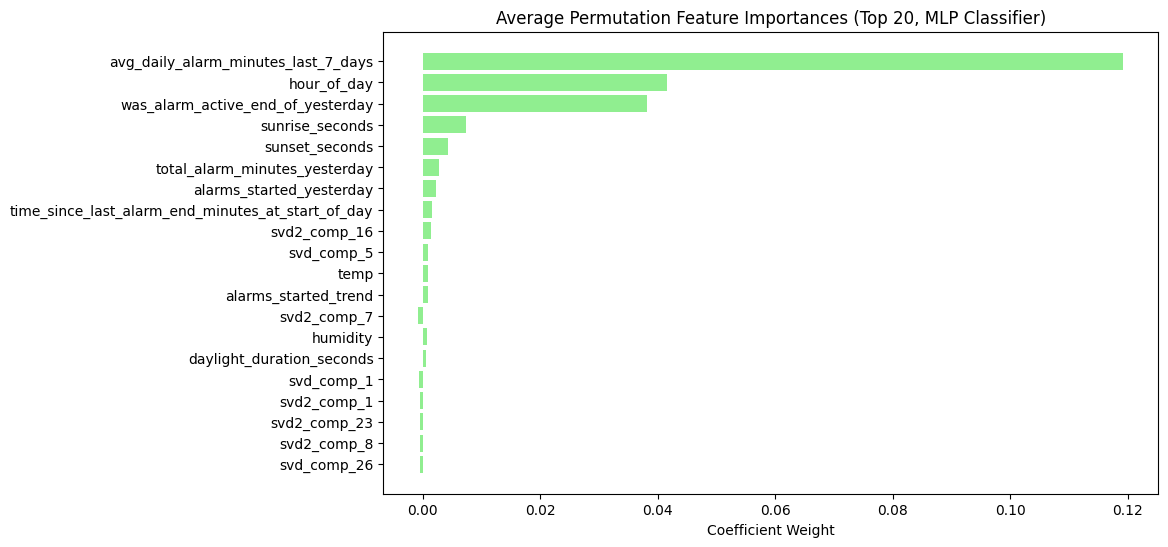

In [30]:
df_avg_hgb_top20 = df_avg_hgb.sort_values(by="Absolute", ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(df_avg_hgb_top20["Feature"], df_avg_hgb_top20["Coefficient"], color='lightgreen')
plt.xlabel("Coefficient Weight")
plt.title("Average Permutation Feature Importances (Top 20, MLP Classifier)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 4.5. SAVING FINAL MLP

final_scaler = StandardScaler()
final_model_mlp = MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.1,
        batch_size=128,
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=2000,
        random_state=1,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=15
)
X_scaled_final = final_scaler.fit_transform(X)
final_model_mlp.fit(X_scaled_final, y)

In [ ]:
with open('4__multi-layer_perceptron_classifier__v3.pkl', 'wb') as f:
    pickle.dump(final_model_mlp, f)

with open('final_scaler.pkl', 'wb') as f:
    pickle.dump(final_scaler, f)